In [3]:
import pandas as pd

In [4]:
data_frame = pd.read_csv("IBM-Employee-Attrition-Dataset.csv")

In [5]:
pd.options.display.max_columns = 500

data_frame

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


Jobs: Programmer, Baker, Analyst, Pilot

One-Hot Encoding:

Programmer -> 1
Baker -> 2
Analyst -> 3
Pilot -> 4

In [6]:
# Binary: Attrition, Gender, Over18, Overtime
data_frame["Attrition"] = data_frame["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)
data_frame["Gender"] = data_frame["Gender"].apply(lambda x: 1 if x == "Male" else 0)
data_frame["Over18"] = data_frame["Over18"].apply(lambda x: 1 if x == "Y" else 0)
data_frame["OverTime"] = data_frame["OverTime"].apply(lambda x: 1 if x == "Yes" else 0)

In [7]:
data_frame

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8


In [8]:
# BusinessTravel, Department, EduactionField, JobRole, MaritalStatus

data_frame = data_frame.join(pd.get_dummies(data_frame["BusinessTravel"])).drop("BusinessTravel", axis=1)
data_frame = data_frame.join(pd.get_dummies(data_frame["Department"], prefix="Department")).drop("Department", axis=1)
data_frame = data_frame.join(pd.get_dummies(data_frame["EducationField"], prefix="Education")).drop("EducationField", axis=1)
data_frame = data_frame.join(pd.get_dummies(data_frame["JobRole"], prefix="Role")).drop("JobRole", axis=1)
data_frame = data_frame.join(pd.get_dummies(data_frame["MaritalStatus"], prefix="Status")).drop("MaritalStatus", axis=1)

In [9]:
data_frame = data_frame.map(lambda x: 1 if x is True else 0 if x is False else x)

In [10]:
data_frame

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [11]:
data_frame = data_frame.drop("EmployeeNumber", axis=1)

In [12]:
data_frame

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


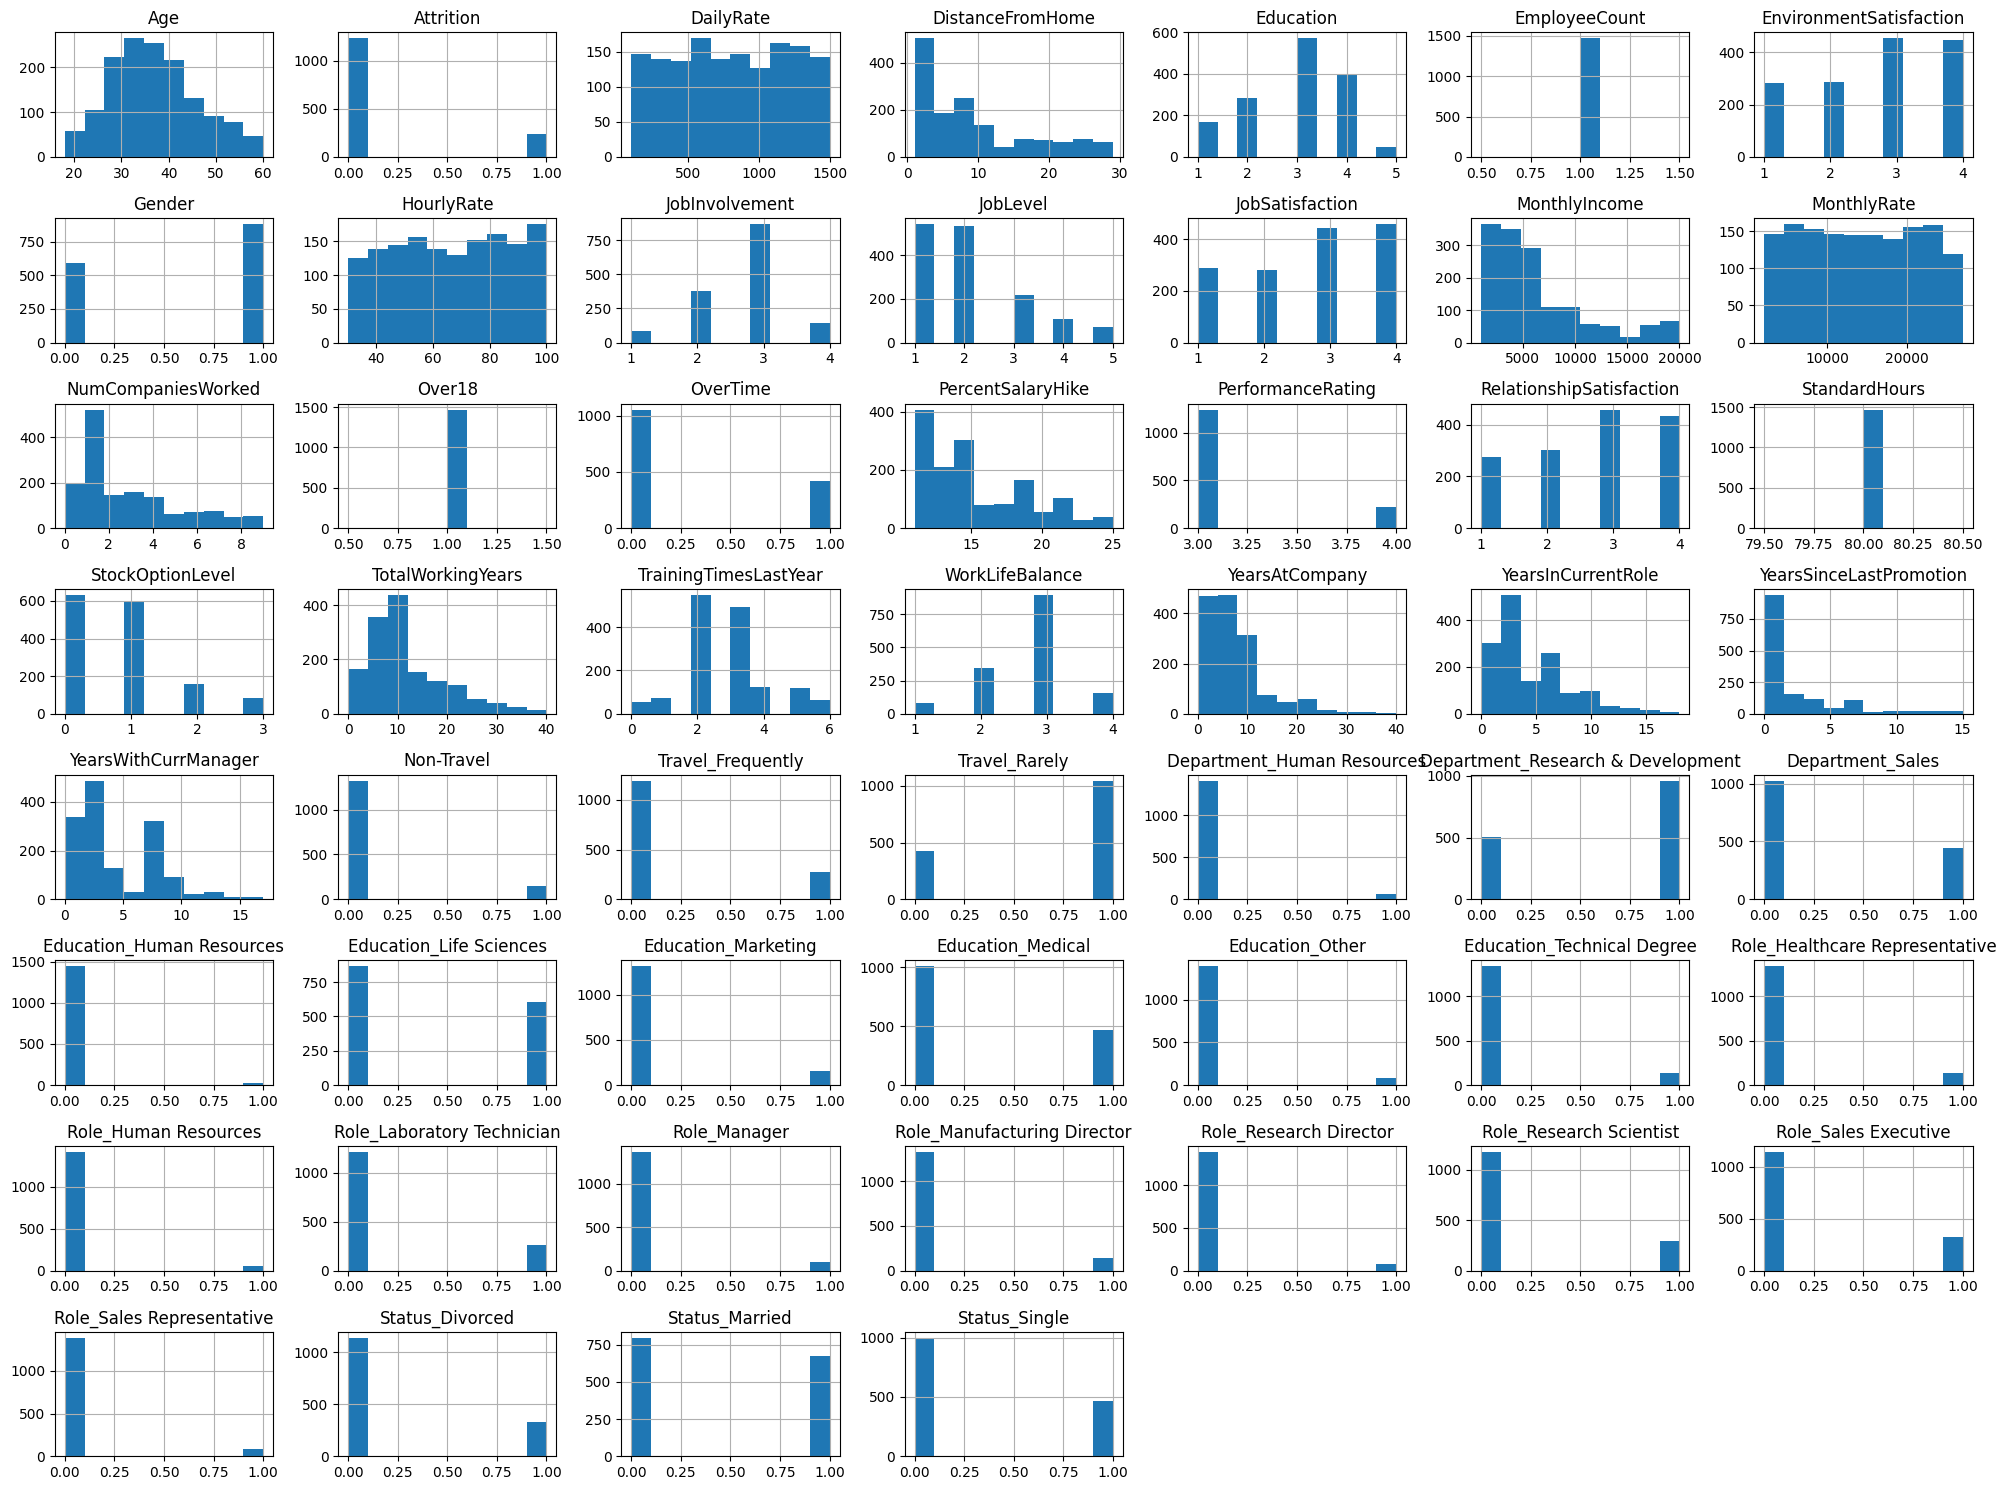

In [13]:
import matplotlib.pyplot as plt

data_frame.hist(figsize=(20, 15))

plt.tight_layout()
plt.show()

In [14]:
# Dropping EmployeeCount, StandardHours, Over18

data_frame = data_frame.drop(["EmployeeCount", "StandardHours", "Over18"], axis=1)

In [15]:
data_frame

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## Model Training

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x, y = data_frame.drop("Attrition", axis=1), data_frame["Attrition"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestClassifier(n_jobs=-1)

model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [17]:
model.score(x_test, y_test)

0.8843537414965986

In [18]:
model.score(x_train, y_train)

1.0

In [19]:
sorted_importances = dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse=True))

In [20]:
sorted_importances

{'MonthlyIncome': np.float64(0.07447537327491517),
 'Age': np.float64(0.0606729870448751),
 'OverTime': np.float64(0.0505948342348552),
 'DailyRate': np.float64(0.04890932213713922),
 'MonthlyRate': np.float64(0.048430799275329325),
 'HourlyRate': np.float64(0.047530701176051696),
 'TotalWorkingYears': np.float64(0.046858410480997946),
 'DistanceFromHome': np.float64(0.04667351260697509),
 'YearsAtCompany': np.float64(0.0365341944872148),
 'PercentSalaryHike': np.float64(0.034261310647451124),
 'NumCompaniesWorked': np.float64(0.03191128443802463),
 'EnvironmentSatisfaction': np.float64(0.0306595524333417),
 'YearsWithCurrManager': np.float64(0.030634634233145063),
 'StockOptionLevel': np.float64(0.0304133916559777),
 'JobSatisfaction': np.float64(0.026894919964603338),
 'YearsInCurrentRole': np.float64(0.026596052360399254),
 'YearsSinceLastPromotion': np.float64(0.02571531827452969),
 'WorkLifeBalance': np.float64(0.025592559989737352),
 'JobInvolvement': np.float64(0.025414191807623

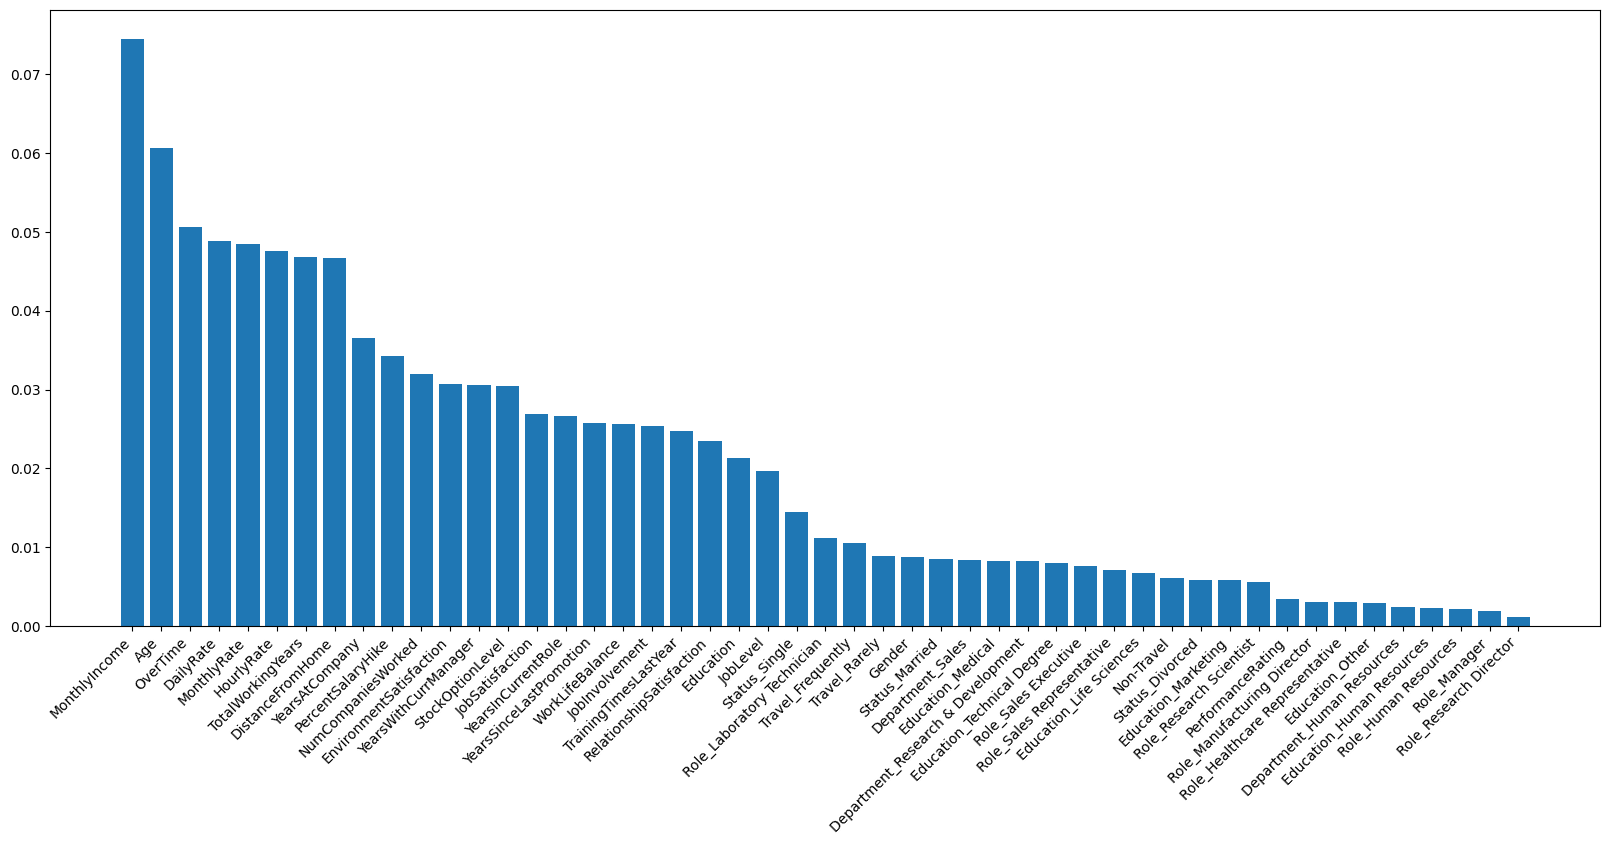

In [21]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,8))
plt.bar(sorted_importances.keys(), sorted_importances.values())
plt.xticks(rotation=45, ha="right")
plt.show()

# Hyperparameter Tuning with GridSearch Cross Validation

In [22]:
print(x_train.shape, y_train.shape)

(1176, 49) (1176,)


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining hyperparameters to tune
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Create the Model
rf = RandomForestClassifier(n_jobs=-1)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring="accuracy")

# Fit the Model
grid_search.fit(x_train, y_train)

print("Best Parameters", grid_search.best_params_)
best_rf = grid_search.best_estimator_
print("Test Set Accuracy", best_rf.score(x_test, y_test))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Set Accuracy 0.8877551020408163


In [24]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=50,
    n_jobs=-1
)

best_model.fit(x_train, y_train)

# Checking accuracy on the test set
accuracy = best_model.score(x_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}")

Final Test Accuracy: 0.8912


In [25]:
# HyperParameterTuning improved the model's ability to predict employee attrition

## Comparing Train and Test Accuracy

In [26]:
train_accuracy = best_model.score(x_train, y_train)
test_accuracy = best_model.score(x_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9881
Test Accuracy: 0.8912


In [27]:
# parameters dictionary includes:
# number and depth of trees (n_estimators)
# Minimum samples required to split
# Minimum samples per leaf

In [28]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    "n_estimators": np.arange(50, 300, 50),
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6],
    "bootstrap": [True, False]
}

rf = RandomForestClassifier(n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring="accuracy"
)

random_search.fit(x_train, y_train)

print("Best Parameters", random_search.best_params_)

best_rf_random = random_search.best_estimator_
test_accuracy = best_rf_random.score(x_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters {'n_estimators': np.int64(200), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}
Test Accuracy: 0.8844


In [29]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Function for Optuna to optimize
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators" ,50, 300, step=50)
    max_depth = trial.suggest_int("max_depth", 10, 50, step=10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 15)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 6)
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        n_jobs=-1
    )

    score = cross_val_score(rf, x_train, y_train, cv=5, scoring="accuracy").mean()

    return score

/Users/barraharrison/Desktop/2025 Coding/Employee-Attrition/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2025-03-02 13:16:28,930] A new study created in memory with name: no-name-817c8b48-aaf5-4fe1-9fae-77398ed96a74
[I 2025-03-02 13:16:29,912] Trial 0 finished with value: 0.850335376848179 and parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 0 with value: 0.850335376848179.
[I 2025-03-02 13:16:30,945] Trial 1 finished with value: 0.8469347277316984 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 5, 'bootstrap': False}. Best is trial 0 with value: 0.850335376848179.
[I 2025-03-02 13:16:32,268] Trial 2 finished with value: 0.8418355571583124 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 0 with value: 0.850335376848179.
[I 2025-03-02 13:16:32,661] Trial 3 finished with value: 0.8452326000721241 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split

In [36]:
print("Best Parameters:", study.best_params)
print("Best Accuracy:", study.best_value)

Best Parameters: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 11, 'min_samples_leaf': 2, 'bootstrap': False}
Best Accuracy: 0.8562928236566896


In [37]:
best_rf_optuna = RandomForestClassifier(
    **study.best_params,
    n_jobs=-1
)

best_rf_optuna.fit(x_train, y_train)

test_accuracy = best_rf_optuna.score(x_test, y_test)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Final Test Accuracy: 0.8878


## Feature Importance Analysis

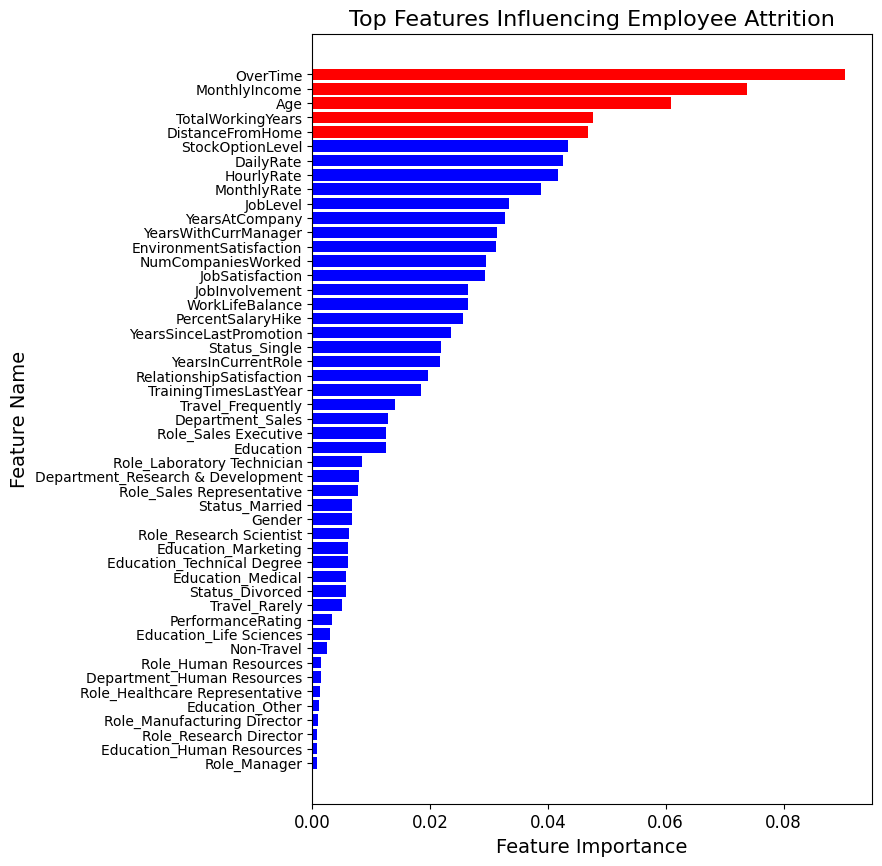

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

feature_importances = best_rf_optuna.feature_importances_
feature_names = x_train.columns

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_names = np.array(feature_names)[sorted_indices]

plt.figure(figsize=(14, 10))
colors = ["red" if i < 5 else "blue" for i in range(len(sorted_indices))]
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align="center", color=colors)

plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Feature Name", fontsize=14)
plt.title("Top Features Influencing Employee Attrition", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(range(len(sorted_indices)), sorted_names, fontsize=10)
plt.gca().invert_yaxis()

plt.subplots_adjust(left=0.5)

plt.show()